In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_curve, auc, classification_report, confusion_matrix
from sklearn.datasets import load_digits
from sklearn.preprocessing import label_binarize
from itertools import cycle

In [7]:
# Set random seed for reproducibility
SEED = 23

In [9]:
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("husl")

# Load dataset
X, y = load_digits(return_X_y=True)

In [11]:
# Split the data
train_X, test_X, train_y, test_y = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=SEED)

print(f"Training set size: {train_X.shape[0]}")
print(f"Test set size: {test_X.shape[0]}")
print(f"Number of features: {train_X.shape[1]}")
print(f"Number of classes: {len(np.unique(y))}")

Training set size: 1347
Test set size: 450
Number of features: 64
Number of classes: 10


D:\Anaconda\Lib\site-packages\numpy\lib\function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
D:\Anaconda\Lib\site-packages\numpy\lib\function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


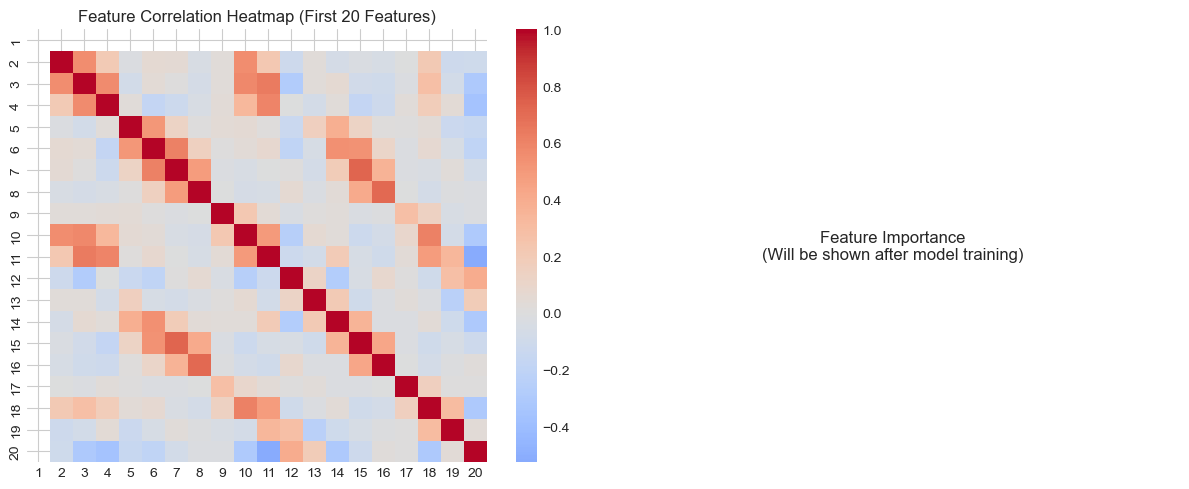

In [13]:
# Data Visualization 1: Initial data exploration
plt.figure(figsize=(12, 5))

# Subplot 1: Correlation heatmap (using first 20 features for clarity)
plt.subplot(1, 2, 1)
# Select first 20 features for clearer visualization
correlation_matrix = np.corrcoef(X[:, :20], rowvar=False)
sns.heatmap(correlation_matrix, cmap='coolwarm', center=0,
            xticklabels=range(1, 21), yticklabels=range(1, 21))
plt.title('Feature Correlation Heatmap (First 20 Features)')

# Subplot 2: Feature importance (placeholder, will be updated after model training)
plt.subplot(1, 2, 2)
plt.text(0.5, 0.5, 'Feature Importance\n(Will be shown after model training)', 
         horizontalalignment='center', verticalalignment='center',
         transform=plt.gca().transAxes, fontsize=12)
plt.axis('off')

plt.tight_layout()
plt.show()

In [15]:
# Train the Gradient Boosting Classifier
print("\nTraining Gradient Boosting Classifier...")
gbc = GradientBoostingClassifier(n_estimators=300,
                                 learning_rate=0.05,
                                 random_state=100,
                                 max_features=5)

gbc.fit(train_X, train_y)

# Make predictions
pred_y = gbc.predict(test_X)
pred_proba = gbc.predict_proba(test_X)


Training Gradient Boosting Classifier...


In [17]:
# Calculate accuracy
acc = accuracy_score(test_y, pred_y)
print("Gradient Boosting Classifier accuracy is: {:.4f}".format(acc))

# Print classification report
print("\nClassification Report:")
print(classification_report(test_y, pred_y))

Gradient Boosting Classifier accuracy is: 0.9778

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       0.98      0.98      0.98        48
           2       1.00      1.00      1.00        46
           3       1.00      1.00      1.00        41
           4       1.00      0.96      0.98        49
           5       0.94      0.98      0.96        50
           6       1.00      1.00      1.00        41
           7       0.97      0.97      0.97        37
           8       0.94      0.96      0.95        46
           9       0.96      0.95      0.95        55

    accuracy                           0.98       450
   macro avg       0.98      0.98      0.98       450
weighted avg       0.98      0.98      0.98       450



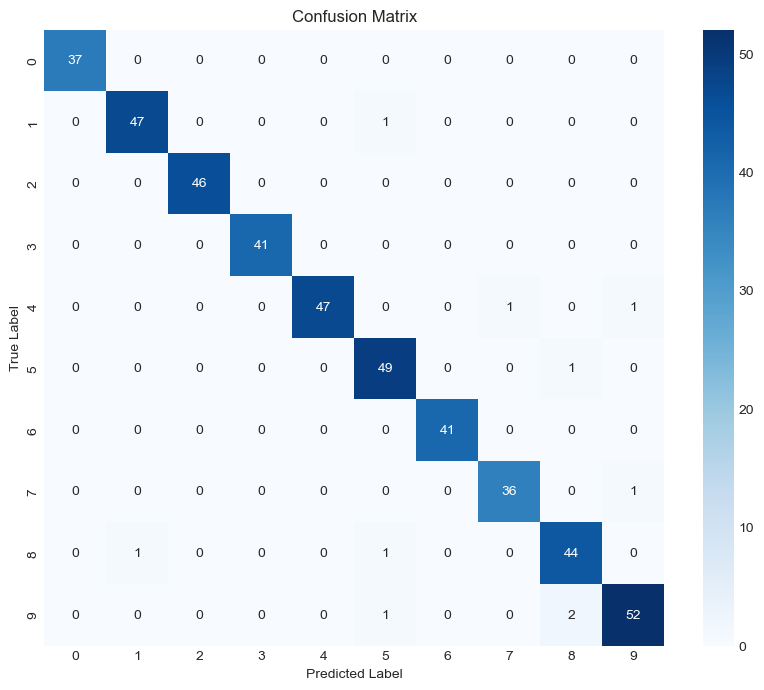

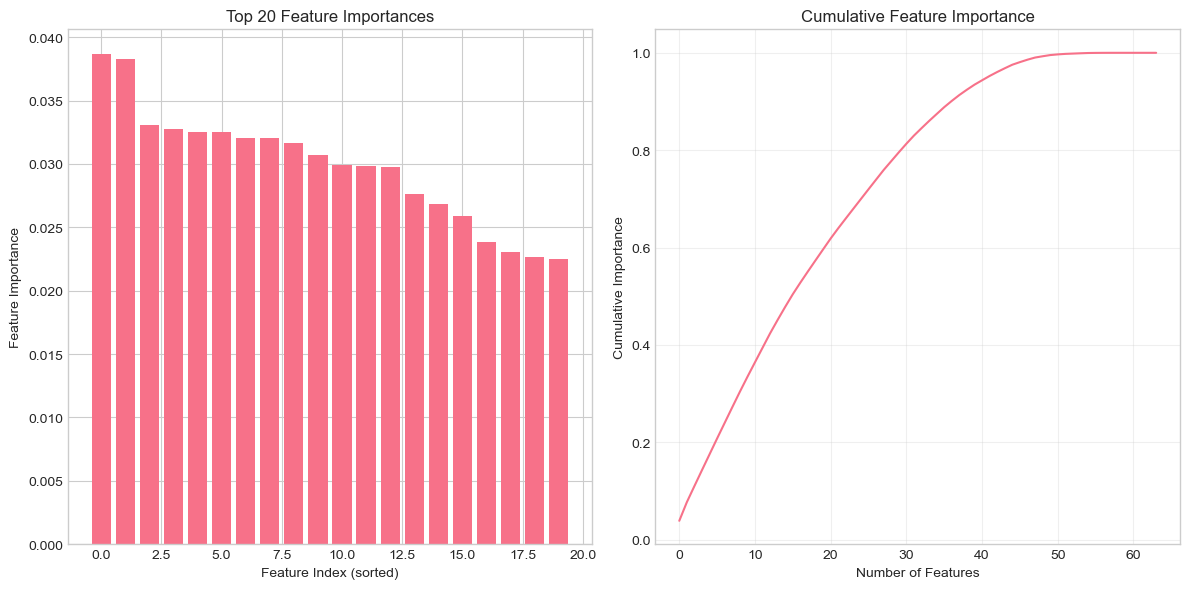

In [19]:
# Data Visualization 2: Confusion Matrix
plt.figure(figsize=(10, 8))
cm = confusion_matrix(test_y, pred_y)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Data Visualization 3: Feature Importance
plt.figure(figsize=(12, 6))
feature_importance = gbc.feature_importances_
sorted_idx = np.argsort(feature_importance)[::-1]

plt.subplot(1, 2, 1)
plt.bar(range(20), feature_importance[sorted_idx][:20])
plt.xlabel('Feature Index (sorted)')
plt.ylabel('Feature Importance')
plt.title('Top 20 Feature Importances')

plt.subplot(1, 2, 2)
cumulative_importance = np.cumsum(feature_importance[sorted_idx])
plt.plot(range(len(feature_importance)), cumulative_importance)
plt.xlabel('Number of Features')
plt.ylabel('Cumulative Importance')
plt.title('Cumulative Feature Importance')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

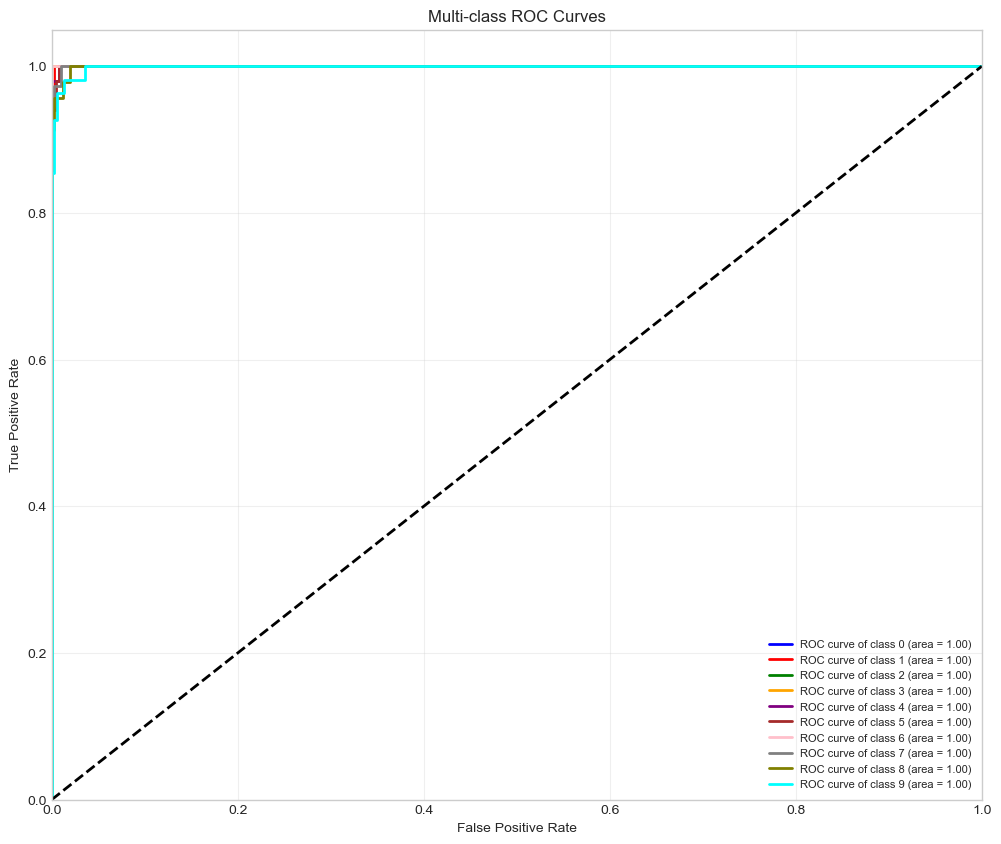

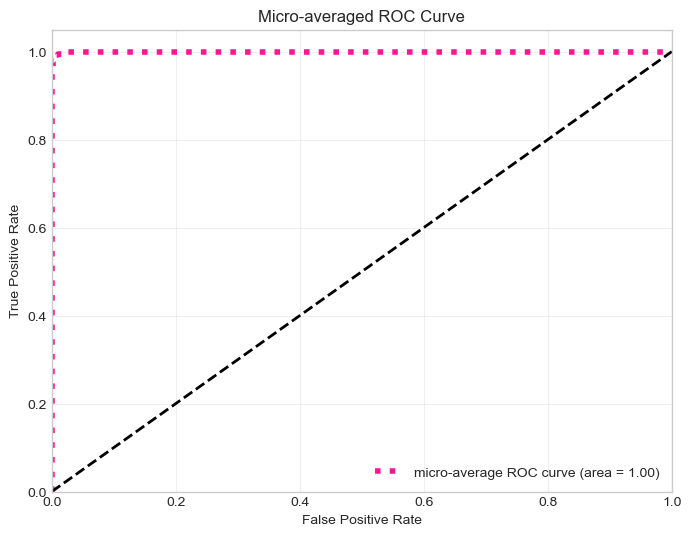

In [21]:
# ROC Curve for multi-class classification
plt.figure(figsize=(12, 10))

# Binarize the output for multi-class ROC
y_test_bin = label_binarize(test_y, classes=range(10))
n_classes = y_test_bin.shape[1]

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_bin.ravel(), pred_proba.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Plot all ROC curves
colors = cycle(['blue', 'red', 'green', 'orange', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan'])

for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-class ROC Curves')
plt.legend(loc="lower right", fontsize=8)
plt.grid(True, alpha=0.3)
plt.show()

# Plot micro-averaged ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Micro-averaged ROC Curve')
plt.legend(loc="lower right")
plt.grid(True, alpha=0.3)
plt.show()

In [23]:
# Print overall performance metrics
print("\nOverall Performance Metrics:")
print(f"Accuracy: {acc:.4f}")
print(f"Micro-average AUC: {roc_auc['micro']:.4f}")

# Calculate mean AUC across all classes
mean_auc = np.mean([roc_auc[i] for i in range(n_classes)])
print(f"Mean Class AUC: {mean_auc:.4f}")


Overall Performance Metrics:
Accuracy: 0.9778
Micro-average AUC: 0.9998
Mean Class AUC: 0.9997
